In [3]:
import datetime
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (15.0, 10.0)


## First we need to get the last three years data.
This code will ensure that it's up to date

In [4]:
today_epoch = (datetime.date.today() - datetime.timedelta(days=1)).strftime("%s")
threeyear_epoch = (datetime.date.today() - datetime.timedelta(days=(365*3))).strftime("%s")


## Download that 3 year data

In [5]:
data_url = "https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=%s&period2=%s&interval=1d&events=history" % (threeyear_epoch,today_epoch)
req = requests.get(data_url)
url_content = req.content
csv_file = open('msft-3-year.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [6]:
df = pd.read_csv('msft-3-year.csv')

# Convert Date to actual Date
df["Date"]=pd.to_datetime(df['Date']) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,73.339996,73.889999,72.980003,73.610001,70.386902,21556000
1,2017-09-06,73.739998,74.040001,73.349998,73.400002,70.186096,16535800
2,2017-09-07,73.680000,74.599998,73.599998,74.339996,71.084930,17471200
3,2017-09-08,74.330002,74.440002,73.839996,73.980003,70.740700,14703800
4,2017-09-11,74.309998,74.940002,74.309998,74.760002,71.486542,17910400


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,126.895929,128.169509,125.530265,126.940358,124.767420,3.024161e+07
std,36.903946,37.450940,36.391889,37.000644,37.937296,1.457248e+07
min,73.339996,73.809998,72.919998,73.260002,70.052216,7.425600e+06
25%,98.752502,99.937498,97.332499,98.615000,95.650294,2.076050e+07
50%,114.575001,115.079998,113.765000,114.474998,111.590221,2.624575e+07
75%,148.782502,150.270001,147.952503,149.532501,148.295692,3.466412e+07
max,228.179993,231.149994,226.580002,228.910004,228.910004,1.112421e+08


In [8]:
minPrice = df.describe()["Adj Close"]["min"]
print("min:",minPrice, "min date:")
print(df[df["Adj Close"]==minPrice]["Date"])
maxPrice = df.describe()["Adj Close"]["max"]
print("max:",maxPrice, "max date:")
print(df[df["Adj Close"]==maxPrice]["Date"])
maxVol = df.describe()["Volume"]["max"]
print("max vol:",maxVol, "max vol date:")
df[df["Volume"]==maxVol]["Date"]

min: 70.052216 min date:
14   2017-09-25
15   2017-09-26
Name: Date, dtype: datetime64[ns]
max: 228.91000400000001 max date:
751   2020-08-28
Name: Date, dtype: datetime64[ns]
max vol: 111242100.0 max vol date:


327   2018-12-21
Name: Date, dtype: datetime64[ns]

/Users/david/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


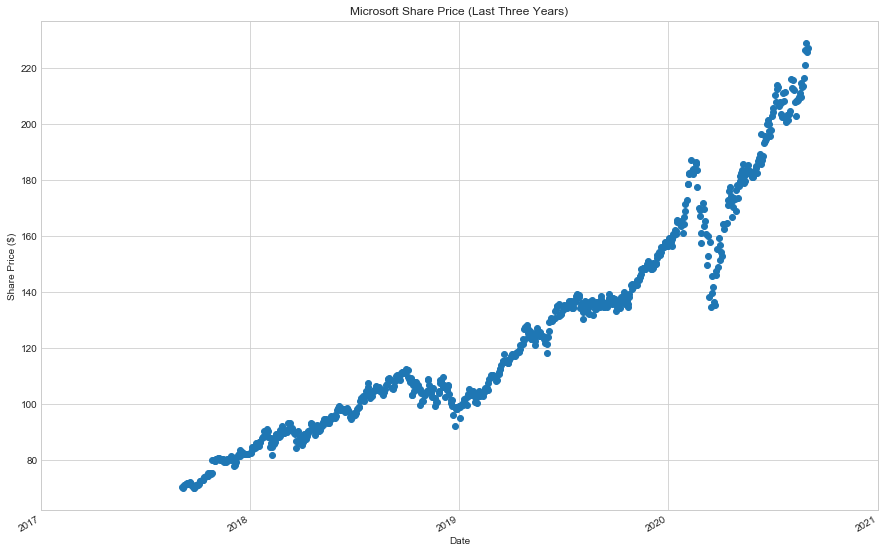

In [9]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
#ax.plot("Date","Adj Close", data=df)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(df['Date'].iloc[0], 'Y')
datemax = np.datetime64(df['Date'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()
ax.set_xlabel("Date")
ax.set_ylabel("Share Price ($)")
ax.set_title("Microsoft Share Price (Last Three Years)")
#plt.show()
plt.plot_date(df["Date"], df["Adj Close"])

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,73.339996,73.889999,72.980003,73.610001,70.386902,21556000
1,2017-09-06,73.739998,74.040001,73.349998,73.400002,70.186096,16535800
2,2017-09-07,73.680000,74.599998,73.599998,74.339996,71.084930,17471200
3,2017-09-08,74.330002,74.440002,73.839996,73.980003,70.740700,14703800
4,2017-09-11,74.309998,74.940002,74.309998,74.760002,71.486542,17910400
...,...,...,...,...,...,...,...
749,2020-08-26,217.880005,222.089996,217.360001,221.149994,221.149994,39600800
750,2020-08-27,222.889999,231.149994,219.399994,226.580002,226.580002,57602200
751,2020-08-28,228.179993,230.639999,226.580002,228.910004,228.910004,26292900
752,2020-08-31,227.000000,228.699997,224.309998,225.529999,225.529999,28774200


In [11]:
data = df.loc[1:,"Adj Close"].tolist()
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
window_width=7
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

for x in range(7):
    ma_vec = np.insert(ma_vec,0,0,axis=0)
ma_vec


array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  71.18875343,
        71.44966129,  71.56167714,  71.76111714,  71.78570557,
        71.72149986,  71.61221857,  71.405947  ,  71.12591343,
        70.94696271,  70.73249714,  70.671026  ,  70.72566886,
        70.70517843,  70.90052029,  71.27071157,  71.56440729,
        71.89498343,  72.14086786,  72.388117  ,  72.77879657,
        73.16128214,  73.39077314,  73.607969  ,  73.78828329,
        74.00957943,  74.33605971,  74.56965214,  74.75679571,
        74.89066771,  75.05049043,  75.89742186,  76.7143    ,
        77.31125   ,  77.90546757,  78.61443343,  79.36710914,
        80.147109  ,  80.20994471,  80.301468  ,  80.42577471,
        80.52003143,  80.50363914,  80.491346  ,  80.34473629,
        80.25565114,  80.01712143,  79.86064043,  79.89758314,
        79.84258714,  79.79178957,  79.91397543,  80.14461957,
        80.27366857,  80.49882071,  80.57295657,  80.29

In [12]:

dfseven =  pd.DataFrame(ma_vec)
dfseven

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
749,214.227142
750,216.455715
751,219.200001
752,220.764287


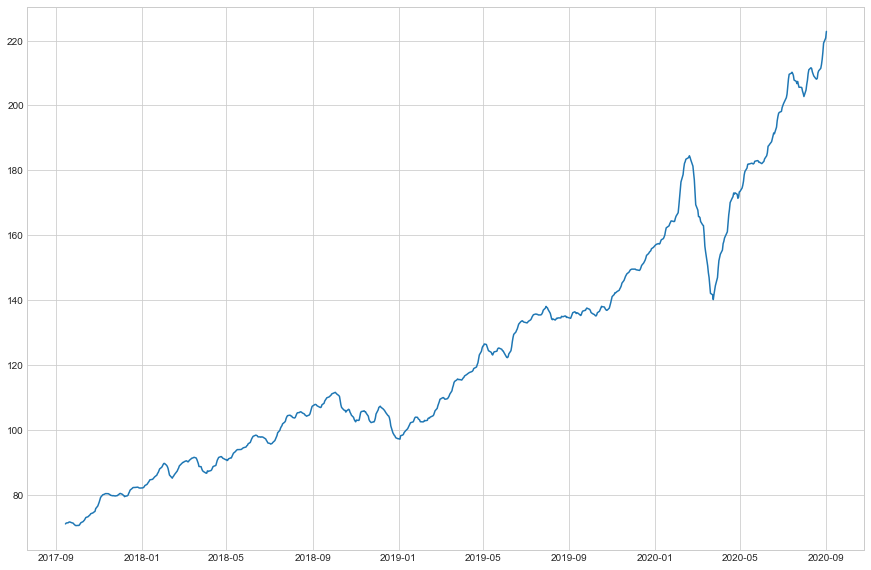

In [13]:
fig, ax = plt.subplots()
plt.plot(df["Date"][7:],dfseven[7:])

[]

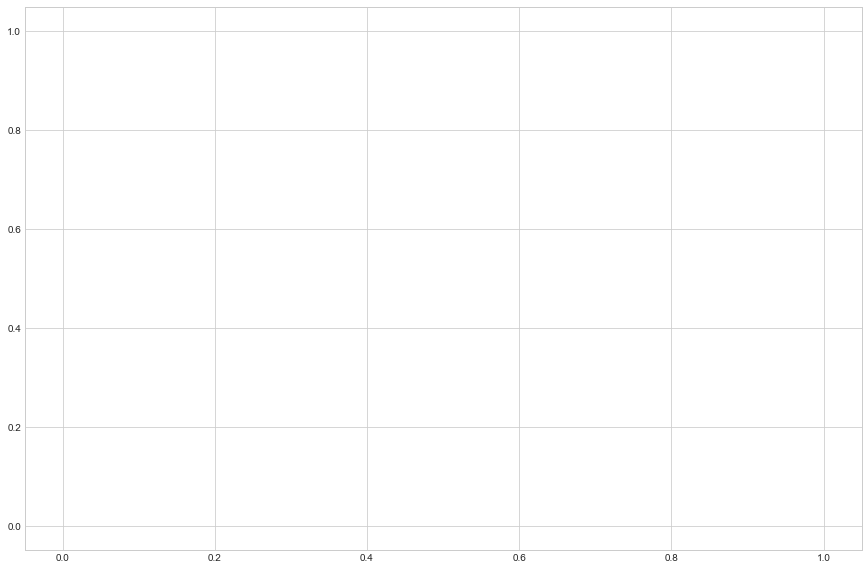

In [14]:
fig, ax = plt.subplots()
ax.plot(data=ma_vec)


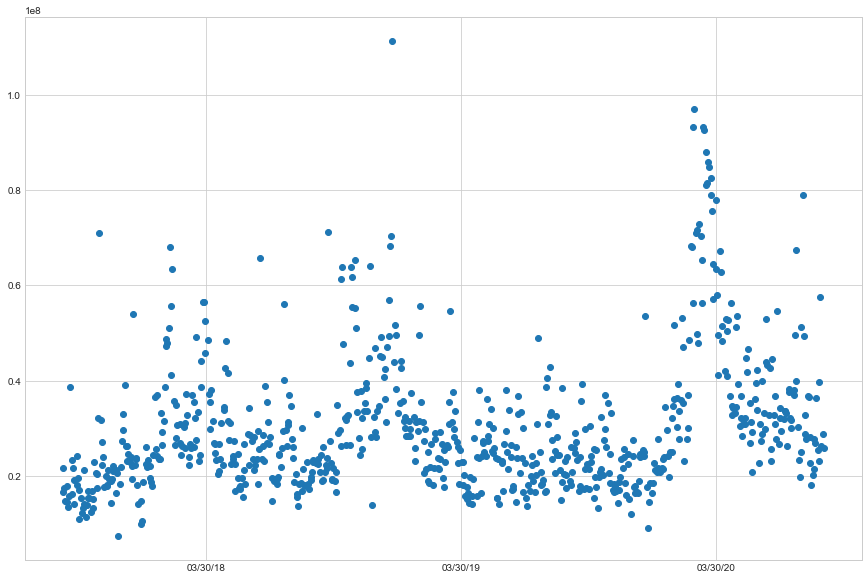

In [15]:
fig, ax = plt.subplots()
rule = rrulewrapper(YEARLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.plot_date(df["Date"], df["Volume"])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)

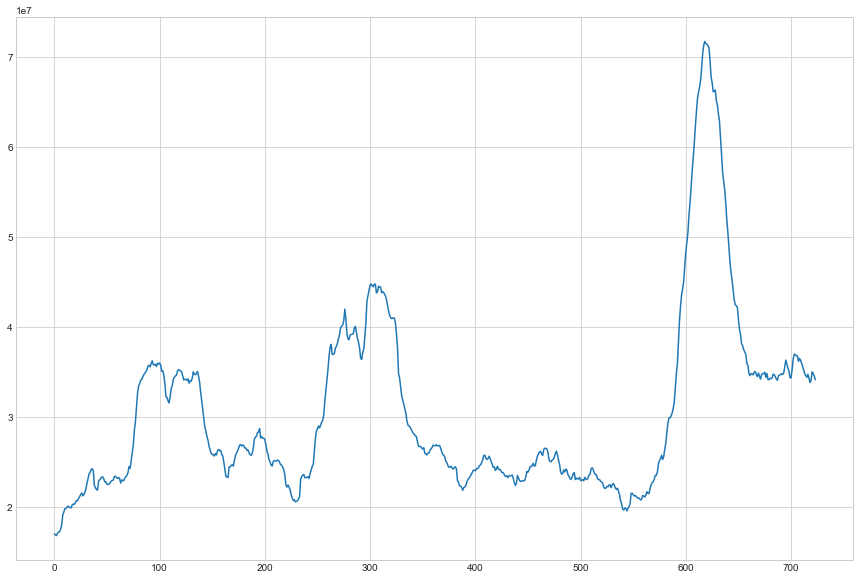

In [16]:
data = df.loc[1:,"Volume"].tolist()
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
window_width=30
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
plt.plot(ma_vec)

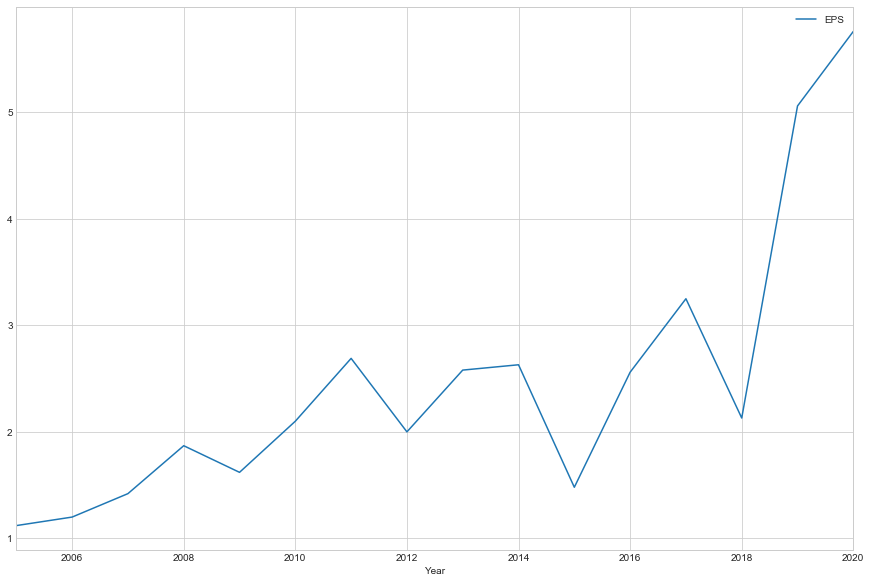

In [17]:
df = pd.read_csv('eps.csv')
df=df.sort_values("Year", ascending=1)
df=df.set_index("Year")
df.plot()


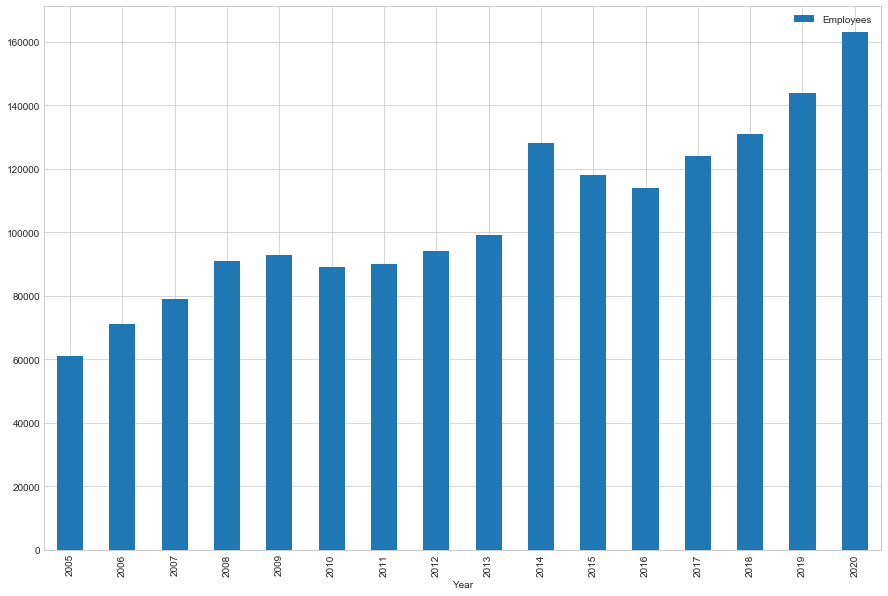

In [19]:
df = pd.read_csv('employees.csv')
df=df.sort_values("Year", ascending=1)
df=df.set_index("Year")
df.plot.bar()

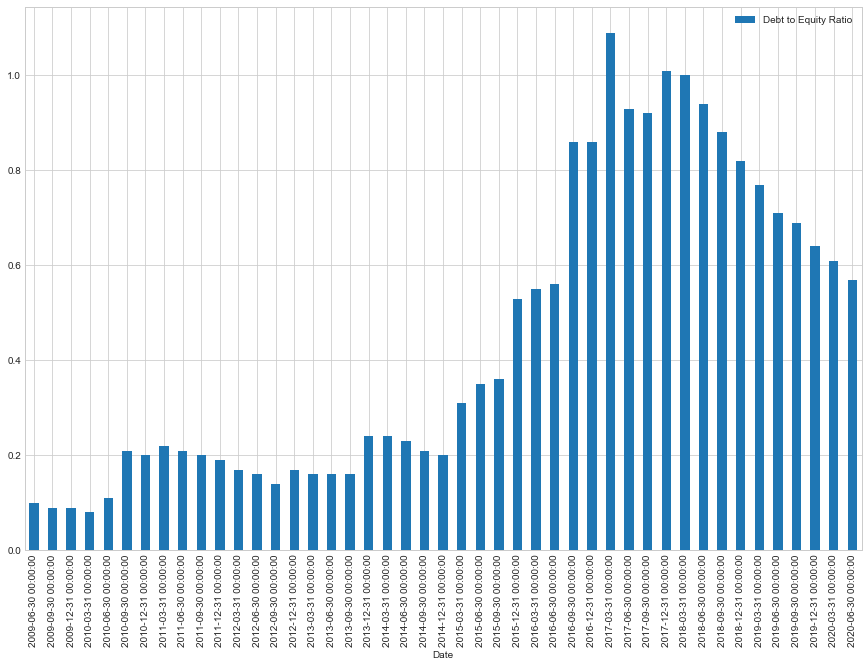

In [31]:
df = pd.read_csv('debt.csv')
df=df.sort_values("Date", ascending=1)

df["Date"]=pd.to_datetime(df['Date']) 

df.plot.bar(x="Date",y="Debt to Equity Ratio")